# **Importing Libraries**

In [209]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import tensorflow as tf

In [210]:
import warnings
warnings.filterwarnings('ignore')

In [211]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense, Reshape, SimpleRNN
from sklearn.ensemble import StackingRegressor

In [212]:
df=pd.read_csv(r"C:\Users\Harsh Gupta\OneDrive\Desktop\Capstone\Project\Dataset\yield_df.csv")

In [213]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# **One Hot Encoding & Scaling**

One Hot Encoding converts categorical columns into numerical ones, and then we use scaling so that the data can be fitted by machine learning models which only take numerical data.

In [214]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [216]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [217]:
X_train_final = preprocesser.fit_transform(X_train)
X_test_final = preprocesser.transform(X_test)

In [218]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

In [219]:
results = []

### Function for Plotting

In [220]:
def plotting(y_pred, name):
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name +' Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

### Function for Calculating performance metrics

In [221]:
def accuracy_scores(model, y_pred, name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, RMSE, R2_score))
    print(f'The RMSE of {name} Test is {RMSE:.2f}')
    acc = R2_score
    print(f'The r2 score of {name} Test is {acc:.2f}')

# <center>Training over Base Models</center>

# **Linear Regression**

The RMSE of Linear Regression Test is 42368.15
The r2 score of Linear Regression Test is 0.76


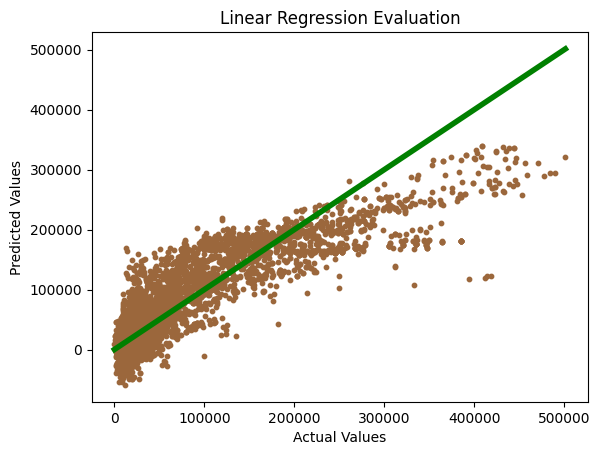

In [222]:
model = LinearRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
accuracy_scores(model, y_pred, 'Linear Regression')
plotting(y_pred, 'Linear Regression')

# **Decision Tree**

The RMSE of Decision Tree Test is 18031.98
The r2 score of Decision Tree Test is 0.96


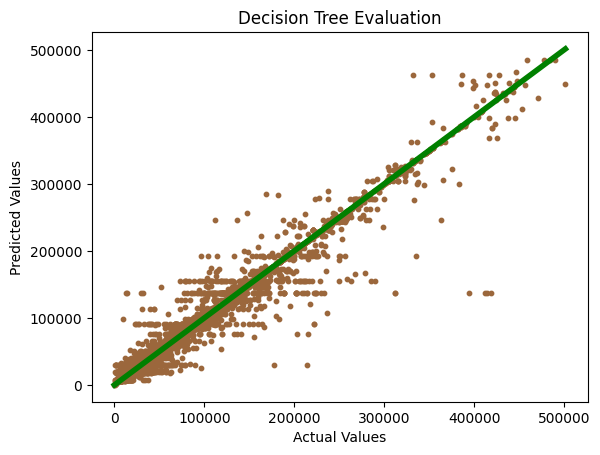

In [241]:
model = DecisionTreeRegressor(max_depth=15, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
accuracy_scores(model, y_pred, 'Decision Tree')
plotting(y_pred, 'Decision Tree')

# **Random Forest**

The RMSE of Random Forest Test is 12325.10
The r2 score of Random Forest Test is 0.98


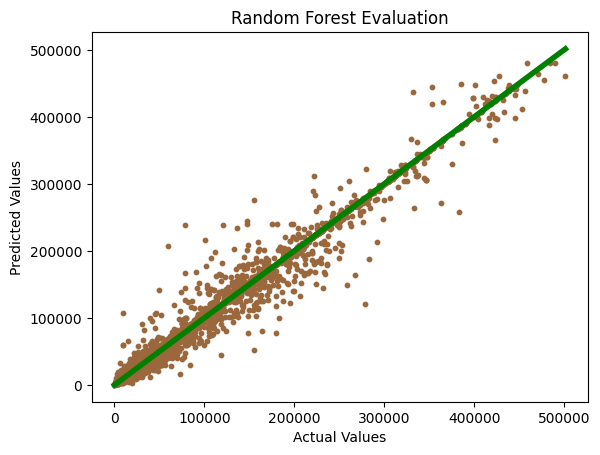

In [224]:
model = RandomForestRegressor(n_estimators=2, random_state=10)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
accuracy_scores(model, y_pred, 'Random Forest')
plotting(y_pred, 'Random Forest')

# **Gradient Boosting**

The RMSE of Gradient Boosting Test is 14829.37
The r2 score of Gradient Boosting Test is 0.97


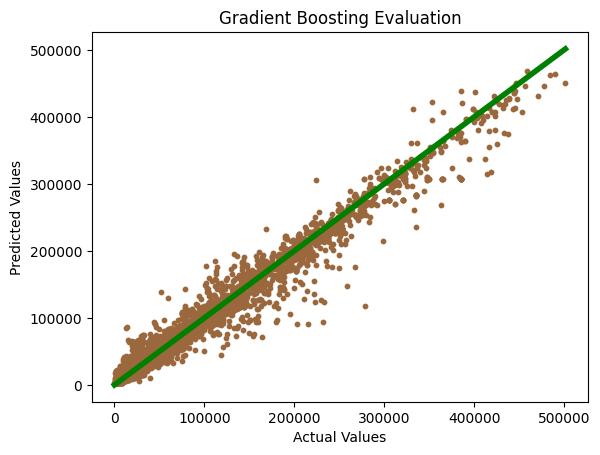

In [225]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8,random_state=42)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
accuracy_scores(model, y_pred, 'Gradient Boosting')
plotting(y_pred, 'Gradient Boosting')

# **KNN**

The RMSE of KNN Test is 15020.52
The r2 score of KNN Test is 0.97


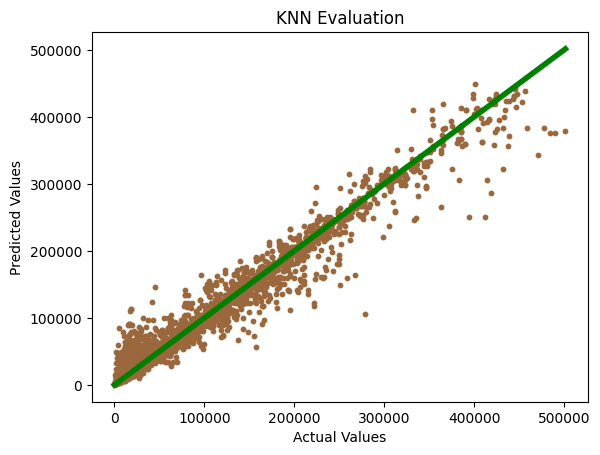

In [226]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
accuracy_scores(model, y_pred, 'KNN')
plotting(y_pred, 'KNN')

# **Bagging Regressor**

The RMSE of Bagging Regressor Test is 13294.79
The r2 score of Bagging Regressor Test is 0.98


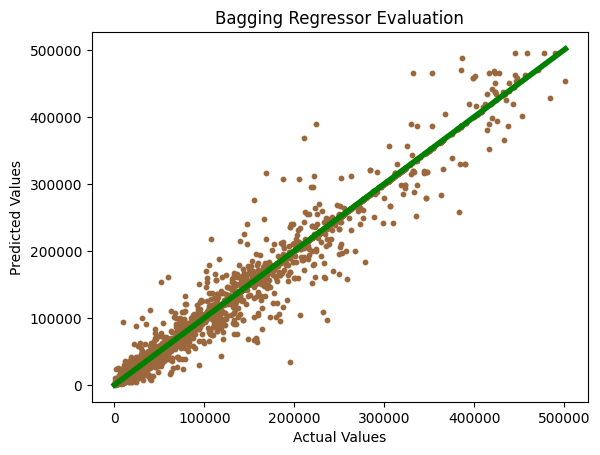

In [227]:
model = BaggingRegressor(n_estimators=1, random_state=42)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
accuracy_scores(model, y_pred, 'Bagging Regressor')
plotting(y_pred, 'Bagging Regressor')

# **Ridge Regression**

The RMSE of Ridge Regression Test is 42376.18
The r2 score of Ridge Regression Test is 0.76


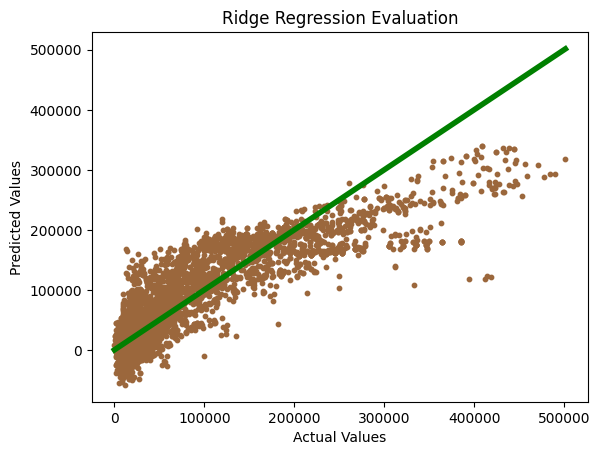

In [228]:
model = Ridge(alpha=1.0)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
accuracy_scores(model, y_pred, 'Ridge Regression')
plotting(y_pred, 'Ridge Regression')

# <center>Stacked Ensemble Model</center>

## **Stacking Random Forest, Gradient Boosting & Bagging Regressor**

In [229]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
bagging = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [230]:
def build_rnn_model(input_shape):
    model = Sequential([
        Reshape((1, input_shape[0]), input_shape=input_shape),
        SimpleRNN(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [231]:
# Stacked Regressor
class StackedRegressor:
    def __init__(self, base_models, final_model):
        self.base_models = base_models
        self.final_model = final_model
    
    def fit_base_models(self, X, y):
        self.meta_features = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            model.fit(X, y)
            self.meta_features[:, i] = model.predict(X)
    
    def fit(self, X, y):
        self.fit_base_models(X, y)
        self.final_model.fit(self.meta_features, y)
    
    def predict(self, X):
        meta_features = np.column_stack([model.predict(X) for model in self.base_models])
        return self.final_model.predict(meta_features)

177/177 [==============================] - 1s 2ms/step
The RMSE of Stacked Ensemble Model Test is 9274.10
The r2 score of Stacked Ensemble Model Test is 0.99


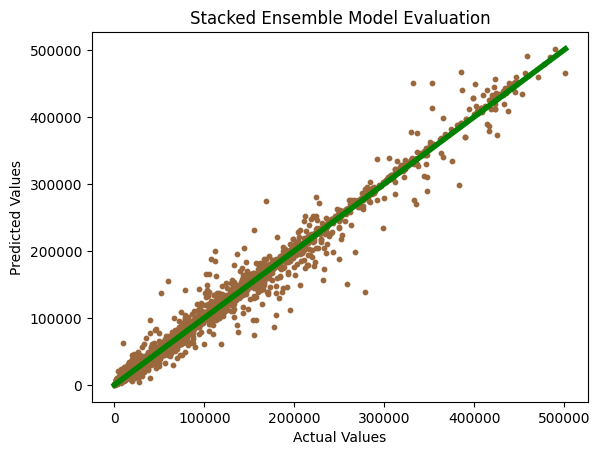

In [232]:
# Initialize final Deep Learning model
final_model = build_rnn_model(input_shape=(len([rf, bagging, gbr]),))

# Initialize stacked regressor
stacked_regressor = StackedRegressor(base_models=[rf, bagging, gbr], final_model=final_model)

# Fit the stacked regressor
stacked_regressor.fit(X_train_final, y_train)

# Evaluate the stacked regressor
y_pred = stacked_regressor.predict(X_test_final)

accuracy_scores(stacked_regressor, y_pred, 'Stacked Ensemble Model')
plotting(y_pred, 'Stacked Ensemble Model')

In [238]:
# Saving the models using pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

### Tabular Representation of scores

In [234]:
dff = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['R2_score'], color='green').highlight_min(subset=['RMSE'], color='green').highlight_max(subset=['RMSE'], color='red').highlight_min(subset=['R2_score'], color='red')
display(df_styled_best)

,Model,RMSE,R2_score
0,Linear Regression,42368.150425,0.759728
1,Decision Tree,18171.609977,0.955801
2,Random Forest,12325.099476,0.979667
3,Gradient Boosting,14829.374518,0.970565
4,KNN,15020.518302,0.969801
5,Bagging Regressor,13294.785077,0.976341
6,Ridge Regression,42376.177776,0.759637
7,Stacked Ensemble Model,9274.095706,0.988488


In [239]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = model.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
output = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

In [240]:
output

array([36613.])